In [20]:
import pandas as pd

In [21]:
# https://www.kaggle.com/nikdavis/datasets

## interpretation

### setup

In [22]:
from fastai.collab import *

In [23]:
df_shuffle = pd.read_hdf("df_shuffle.h5", "df_shuffle")

In [24]:
data = CollabDataBunch.from_df(
    df_shuffle,
    user_name="username",
    item_name="name",
    rating_name="recommended",
    seed=36,
)

In [25]:
train_dataset = data.train_ds.inner_df

In [26]:
train_dataset.head()

,product_id,recommended,username,name
0,611790,1.0,Grunt95,House Party
1,233470,0.0,「Ｂｏｋｕ♥」,Evoland
2,821610,0.0,Beans,My Sunny Resort
3,302710,0.0,Styxplorer,BlazeRush
4,346920,0.0,(YouTube)Dragnix,Undead Shadows


In [27]:
data.show_batch()

username,name,target
Mister B,Titan Souls,1.0
Adler,Tom Clancy's Ghost Recon® Wildlands,0.0
Moon,Magicka,1.0
Aluminum Elite Master,Total War: MEDIEVAL II – Definitive Edition,1.0
MegaGame,Defiance 2050,0.0


In [28]:
learn = collab_learner(data, n_factors=50)

In [29]:
learn.load("dotprod4")

CollabLearner(data=TabularDataBunch;

Train: LabelList (1388139 items)
x: CollabList
username Grunt95; name House Party; ,username 「Ｂｏｋｕ♥」; name Evoland; ,username Beans; name My Sunny Resort; ,username Styxplorer; name BlazeRush; ,username (YouTube)Dragnix; name Undead Shadows; 
y: FloatList
1.0,0.0,0.0,0.0,0.0
Path: .;

Valid: LabelList (347034 items)
x: CollabList
username Dwigt; name Rivals of Aether; ,username lmao; name The Witcher® 3: Wild Hunt; ,username o}}{{![)3; name GRID 2; ,username unknowncity; name ETHER VAPOR Remaster; ,username BIRDMAN ~ VEGAN FUTURE; name Supraland; 
y: FloatList
1.0,1.0,1.0,0.0,1.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(36539, 50)
  (i_weight): Embedding(21255, 50)
  (u_bias): Embedding(36539, 1)
  (i_bias): Embedding(21255, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPa

In [30]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(36539, 50)
  (i_weight): Embedding(21255, 50)
  (u_bias): Embedding(36539, 1)
  (i_bias): Embedding(21255, 1)
)

In [31]:
reviews = pd.read_hdf("df_shuffle.h5", "df_shuffle")

In [161]:
reviews

,product_id,recommended,username,name
0,611790,1.0,Grunt95,House Party
1,233470,0.0,「Ｂｏｋｕ♥」,Evoland
2,821610,0.0,Beans,My Sunny Resort
3,302710,0.0,Styxplorer,BlazeRush
4,346920,0.0,(YouTube)Dragnix,Undead Shadows
...,...,...,...,...
1735168,57300,1.0,Juniper,Amnesia: The Dark Descent
1735169,26000,1.0,ACWraith,The Maw
1735170,44350,1.0,An,GRID 2
1735171,24960,1.0,Ravioli,Battlefield: Bad Company™ 2


In [33]:
games_most_reviews_df = (
    reviews.groupby("name")["recommended"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()[:1000]
)

In [34]:
g = reviews.groupby("name")["recommended"].count()

In [35]:
games_most_reviews = g.sort_values(ascending=False).index.values[:1000] = g.sort_values(
    ascending=False
).index.values[:1000]

In [36]:
games_most_reviews[:10]

array(['ARK: Survival Evolved', 'The Witcher® 3: Wild Hunt', 'Dead by Daylight', 'Arma 3', 'Warframe', 'Dota 2',
       "Sid Meier's Civilization® V", 'The Elder Scrolls V: Skyrim Special Edition', 'Portal', "Garry's Mod"],
      dtype=object)

In [37]:
games_most_reviews_df.head(100)

,name,recommended
0,The Witcher® 3: Wild Hunt,10412.0
1,ARK: Survival Evolved,9346.0
2,Arma 3,8663.0
3,Warframe,7754.0
4,Sid Meier's Civilization® V,7239.0
...,...,...
95,Five Nights at Freddy's,1707.0
96,Insurgency: Sandstorm,1704.0
97,Alien Swarm,1702.0
98,INSIDE,1697.0


In [157]:
# games_most_reviews_df.columns = ["name", "nr_review"]

In [158]:
# games_most_reviews_df[games_most_reviews["name"].str.contains("Counter")]

,name,nr_review
79,Counter-Strike: Global Offensive,1946.0
115,Counter-Strike,1536.0
256,Counter-Strike Nexon: Zombies,947.0


this shows, how unreliable (in terms of review numbers) was my scraper, because [Counter-Strike: Global Offensive](https://store.steampowered.com/app/730/CounterStrike_Global_Offensive/) has more then 3 000 000  reviews on website.

### compering train_dataset with games_most_reviews

In [95]:
games_most_reviews_df.head()

,name,nr_review
0,The Witcher® 3: Wild Hunt,10412.0
1,ARK: Survival Evolved,9346.0
2,Arma 3,8663.0
3,Warframe,7754.0
4,Sid Meier's Civilization® V,7239.0


In [96]:
train_dataset.head()

,product_id,recommended,username,name
0,611790,1.0,Grunt95,House Party
1,233470,0.0,「Ｂｏｋｕ♥」,Evoland
2,821610,0.0,Beans,My Sunny Resort
3,302710,0.0,Styxplorer,BlazeRush
4,346920,0.0,(YouTube)Dragnix,Undead Shadows


In [110]:
games_in_train = (
    train_dataset.groupby("name")["recommended"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

In [119]:
games_in_train.head()

,name,recommended
0,The Witcher® 3: Wild Hunt,8314.0
1,ARK: Survival Evolved,7447.0
2,Arma 3,6952.0
3,Warframe,6203.0
4,Sid Meier's Civilization® V,5824.0


In [112]:
games_in_train.shape

(21254, 2)

In [123]:
df = pd.merge(games_most_reviews, games_in_train, how="left", on="name").sort_values(
    by="recommended", ascending=False
)

In [124]:
df.tail()

,name,nr_review,recommended
963,Car Mechanic Simulator 2014,292.0,219.0
992,Fahrenheit: Indigo Prophecy Remastered,282.0,218.0
997,Zenge,281.0,217.0
958,The Red Strings Club,294.0,217.0
999,Shatter,280.0,215.0


In [117]:
df.shape

(1000, 3)

In [118]:
df[df.isna().any(axis=1)]

,name,nr_review,recommended


### games bias

In [38]:
games_bias = learn.bias(games_most_reviews, is_item=True)

In [39]:
games_bias.shape

torch.Size([1000])

In [41]:
reviews.groupby("name")["recommended"].mean().sort_values(ascending=False)

name
The Puppet of Tersa: Episode One    1.0
The Chronicles of Nyanya            1.0
Keyboard Killers                    1.0
Keeplanet                           1.0
Kautic - The Bald Wizard            1.0
                                   ... 
PRO DRIFT RELOADED                  0.0
Escape Station                      0.0
Splotches                           0.0
Beginner'sGame                      0.0
Breath of Warfare                   0.0
Name: recommended, Length: 21831, dtype: float64

In [42]:
mean_recommended = reviews.groupby("name")["recommended"].mean()

 we can zip through (i.e. going through together) each of the movies along with the bias and grab their rating, the bias, and the movie.

In [56]:
games_ratings = [
    (b, i, mean_recommended.loc[i]) for i, b in zip(games_most_reviews, games_bias)
]

In [59]:
games_ratings[:10]

[(tensor(0.3446), 'ARK: Survival Evolved', 0.6077908564739546),
 (tensor(0.6748), 'The Witcher® 3: Wild Hunt', 0.9598967456439569),
 (tensor(0.3945), 'Dead by Daylight', 0.7161931532978617),
 (tensor(0.4813), 'Arma 3', 0.8803861788617886),
 (tensor(0.5515), 'Warframe', 0.9087073713816946),
 (tensor(0.4526), 'Dota 2', 0.8285532994923858),
 (tensor(0.6049), "Sid Meier's Civilization® V", 0.9277201076509035),
 (tensor(0.3980),
  'The Elder Scrolls V: Skyrim Special Edition',
  0.7412864385297845),
 (tensor(0.7258), 'Portal', 0.9755123306703717),
 (tensor(0.6305), "Garry's Mod", 0.9462745098039216)]

In [66]:
games_ratings[0]

(tensor(0.3446), 'ARK: Survival Evolved', 0.6077908564739546)

In [62]:
# The value of the key parameter should be
# a function that takes a single argument and returns a key to use for sorting purposes.
# to sort by tensors, we need to choose [0] in this case
sorted(games_ratings, key=lambda o: o[0])[:15]

[(tensor(-0.0716), 'Spacebase DF-9', 0.1053639846743295),
 (tensor(-0.0352), "Uriel's Chasm", 0.23529411764705882),
 (tensor(0.0032), 'NBA 2K18', 0.36027713625866054),
 (tensor(0.0156), 'Towns', 0.1913978494623656),
 (tensor(0.0814), 'Voxelized', 0.25616698292220114),
 (tensor(0.0841),
  'Magic 2015 - Duels of the Planeswalkers',
  0.37662337662337664),
 (tensor(0.0865), 'X Rebirth', 0.3756906077348066),
 (tensor(0.1024), 'Edge of Space', 0.32821497120921306),
 (tensor(0.1067), 'Takedown: Red Sabre', 0.32142857142857145),
 (tensor(0.1089), 'Bless Online', 0.31296296296296294),
 (tensor(0.1247), 'Argo', 0.4258160237388724),
 (tensor(0.1296), 'Castle Story', 0.40963855421686746),
 (tensor(0.1318), 'Enemy Front', 0.5434782608695652),
 (tensor(0.1396), 'NBA 2K17', 0.5561643835616439),
 (tensor(0.1424), 'NBA 2K19', 0.44638949671772427)]

In [68]:
sorted(games_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.7689), 'Infested Planet', 0.9105367793240556),
 (tensor(0.7580), 'Primordia', 0.9753914988814317),
 (tensor(0.7562), 'Creeper World 3: Arc Eternal', 0.9424603174603174),
 (tensor(0.7529),
  "Defender's Quest: Valley of the Forgotten (DX edition)",
  0.9628318584070796),
 (tensor(0.7527), 'The Room', 0.9657534246575342),
 (tensor(0.7454), 'Hexcells Infinite', 0.9661399548532731),
 (tensor(0.7446), 'DUSK', 0.9716981132075472),
 (tensor(0.7433), 'Infinifactory', 0.9346733668341709),
 (tensor(0.7419), 'GemCraft - Chasing Shadows', 0.9441964285714286),
 (tensor(0.7414), 'West of Loathing', 0.9693140794223827),
 (tensor(0.7396), 'RollerCoaster Tycoon®: Deluxe', 0.9692671394799054),
 (tensor(0.7381), 'The Swapper', 0.9474576271186441),
 (tensor(0.7379), 'Hot Dogs, Horseshoes & Hand Grenades', 0.9552669552669553),
 (tensor(0.7370), 'Downwell', 0.9617428267800212),
 (tensor(0.7356), 'Orcs Must Die!', 0.9526372443487621)]

### games wieghts

In [72]:
game_w = learn.weight(games_most_reviews, is_item=True)

In [74]:
game_w.shape

torch.Size([1000, 50])

In [79]:
def _pca(x, k=2):
    "Compute PCA of `x` with `k` dimensions."
    x = x-torch.mean(x,0)
    U,S,V = torch.svd(x.t())
    return torch.mm(x,U[:,:k])
torch.Tensor.pca = _pca

In [191]:
game_pca = game_w.pca(3)

In [192]:
fac0,fac1,fac2 = game_pca.t()

In [193]:
game_comp = [(f, i) for f,i in zip(fac0, games_most_reviews)]

In [194]:
sorted(game_comp, key=itemgetter(0), reverse=True)[:15]

[(tensor(0.7812), 'NBA 2K17'),
 (tensor(0.5938), 'Dinosaur Hunt'),
 (tensor(0.5787), 'Dungeon Defenders II'),
 (tensor(0.5767), 'X-Blades'),
 (tensor(0.5741), 'The Elder Scrolls®: Legends™'),
 (tensor(0.5654), 'Space Hulk: Deathwing - Enhanced Edition'),
 (tensor(0.5545), 'CPUCores :: Maximize Your FPS'),
 (tensor(0.5324), 'MapleStory'),
 (tensor(0.5280), 'Hurtworld'),
 (tensor(0.5267), 'Blockstorm'),
 (tensor(0.5124), 'AdVenture Communist'),
 (tensor(0.5038), 'Tharsis'),
 (tensor(0.4814), 'Deathgarden'),
 (tensor(0.4808), 'Medieval Engineers'),
 (tensor(0.4805), 'Friday the 13th: The Game')]

In [195]:
game_comp = [(f, i) for f,i in zip(fac1, games_most_reviews)]

In [196]:
sorted(game_comp, key=itemgetter(0), reverse=True)[:15]

[(tensor(0.8634), 'Dead Bits'),
 (tensor(0.8394), 'Warhammer 40,000: Eternal Crusade'),
 (tensor(0.7085), 'SURVIVAL'),
 (tensor(0.6900), 'Argo'),
 (tensor(0.6821), 'Towns'),
 (tensor(0.6788), 'Hurtworld'),
 (tensor(0.6594), 'Z1 Battle Royale'),
 (tensor(0.6489), 'Dead Realm'),
 (tensor(0.6444), 'BRINK'),
 (tensor(0.6373), 'Reign Of Kings'),
 (tensor(0.6308), 'Warhammer 40,000: Dawn of War III'),
 (tensor(0.6277), 'Homefront®: The Revolution'),
 (tensor(0.6140), 'X-Blades'),
 (tensor(0.6015), 'ATLAS'),
 (tensor(0.5873), 'Line of Sight')]

In [197]:
game_comp = [(f, i) for f,i in zip(fac2, games_most_reviews)]

In [198]:
sorted(game_comp, key=itemgetter(0), reverse=True)[:15]

[(tensor(0.7087), 'Anno 2070™'),
 (tensor(0.6674), 'Jurassic World Evolution'),
 (tensor(0.6569), 'The Crew™'),
 (tensor(0.6097), 'Agents of Mayhem'),
 (tensor(0.5818), 'Blood Bowl 2'),
 (tensor(0.5452), 'StarMade'),
 (tensor(0.5284), 'GRAV'),
 (tensor(0.4921), 'Counter-Strike Nexon: Zombies'),
 (tensor(0.4895), "Dragon's Dogma: Dark Arisen"),
 (tensor(0.4516), 'DRAGON BALL XENOVERSE 2'),
 (tensor(0.4511), 'Kentucky Route Zero'),
 (tensor(0.4360), 'Divinity: Dragon Commander'),
 (tensor(0.4309), 'BRINK'),
 (tensor(0.4286), 'bit Dungeon II'),
 (tensor(0.4144), 'Dead Frontier 2')]

In [136]:
idxs = np.random.choice(len(games_most_reviews), 30, replace=False)

In [155]:
df = pd.DataFrame(games_most_reviews)
df.columns = ["name"]

,name
0,ARK: Survival Evolved
1,The Witcher® 3: Wild Hunt
2,Dead by Daylight
3,Arma 3
4,Warframe
...,...
995,Yakuza Kiwami
996,bit Dungeon II
997,Gemini Rue
998,Gas Guzzlers Extreme


In [166]:
df[df["name"].str.contains("DARK SOULS")]

,name
187,DARK SOULS™: REMASTERED
387,DARK SOULS™ III


In [167]:
df[df["name"].str.contains("Factor")]

,name
99,Factorio


In [173]:
my_fav_games_idx = [187, 387, 99]

In [179]:
idxs = list(range(27))

In [180]:
for i in my_fav_games_idx:
    idxs.append(i)

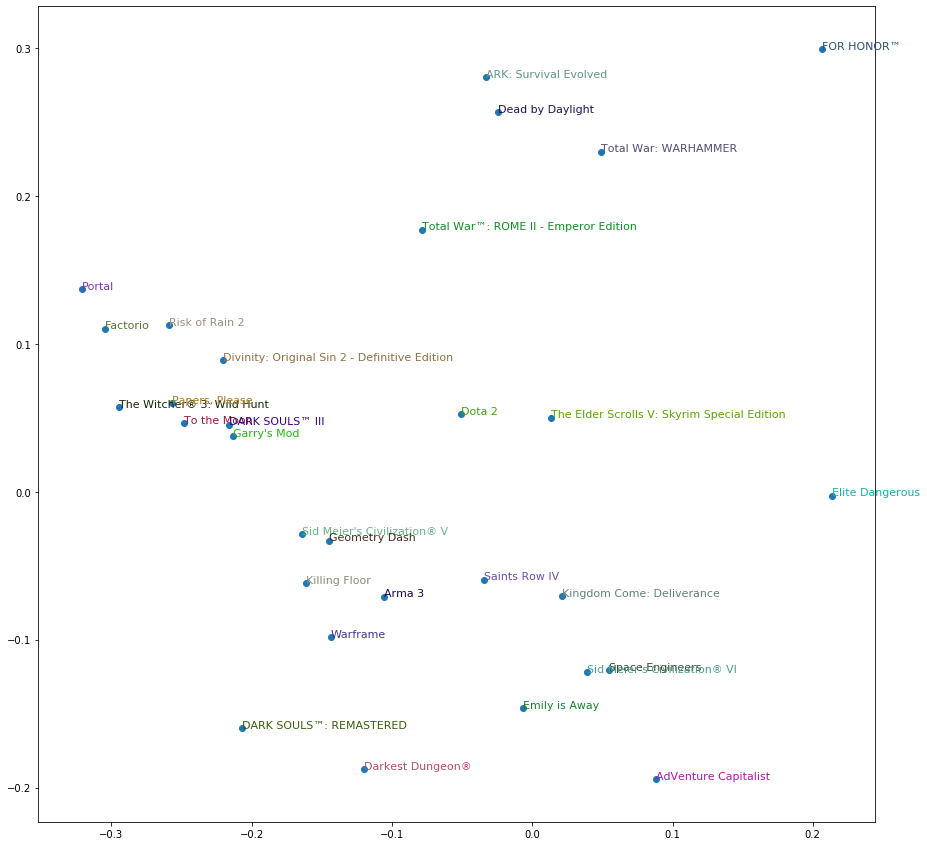

In [188]:
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(games_most_reviews[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

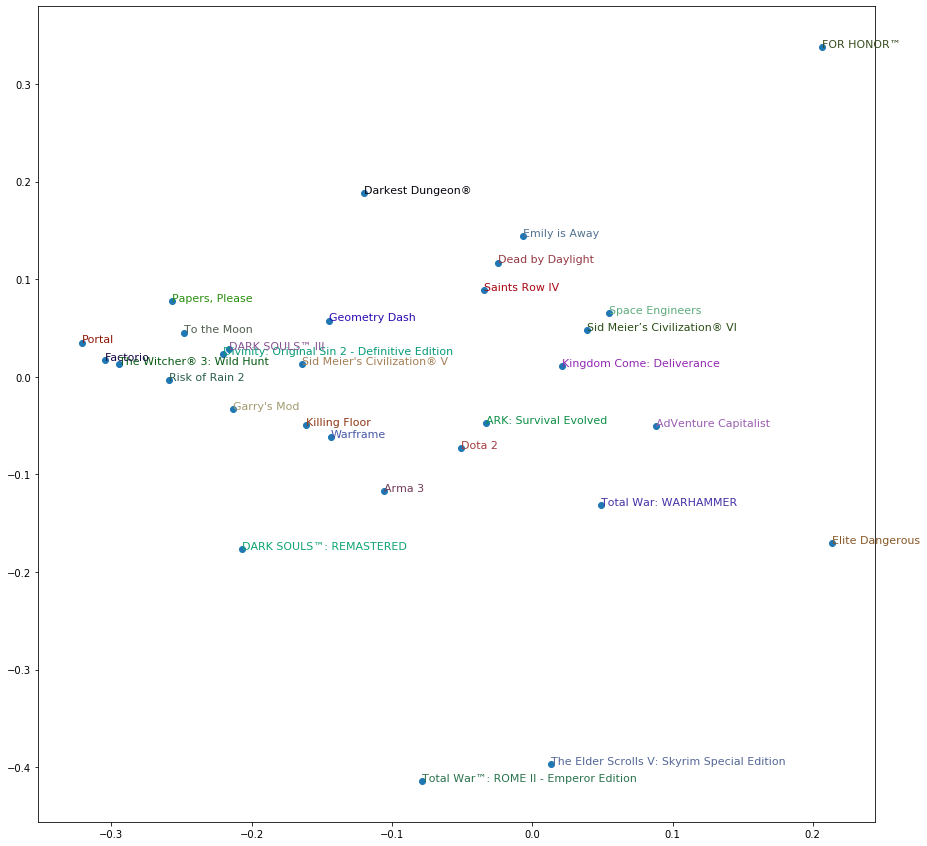

In [189]:
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(games_most_reviews[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

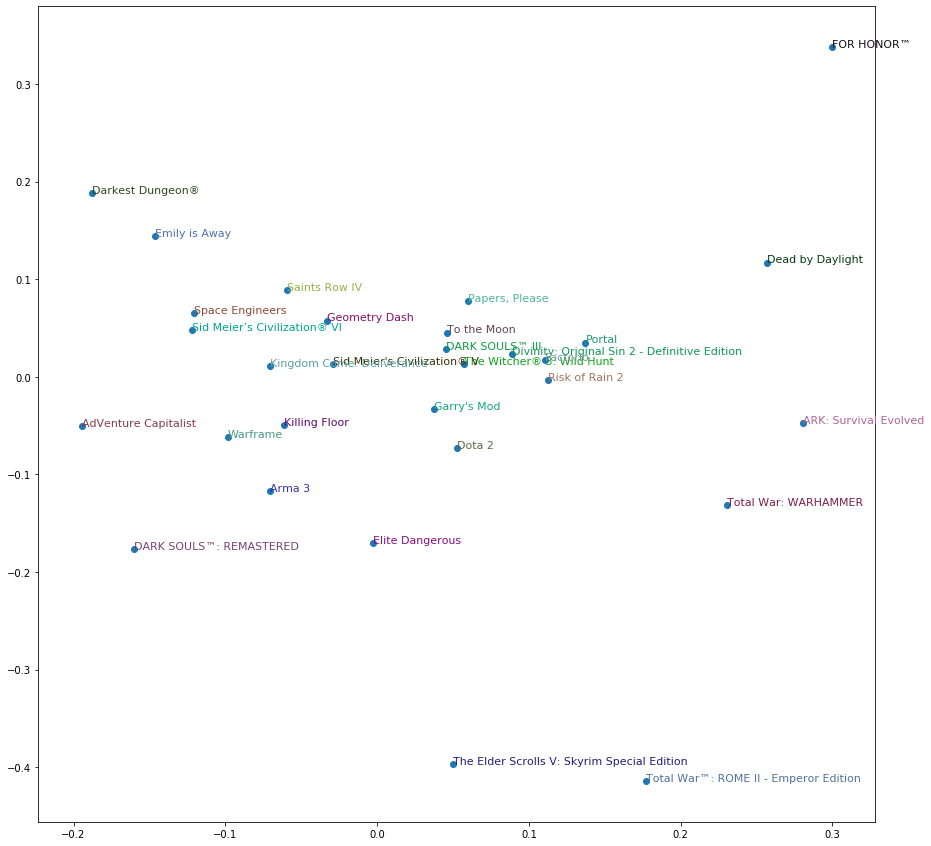

In [190]:
X = fac1[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(games_most_reviews[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()